# Exploring The Automobile MPG Dataset

### Our Objective is 

Build a Regression model able to make predictions about the miles per gallon for a car
### Dataset 
> on Kaggle: https://www.kaggle.com/datasets/roger1315/automobiles

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import datetime

import sklearn

## Exploring the Data

In [2]:
automobile_df= pd.read_csv('datasets/auto-mpg.csv')

automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
automobile_df.shape

(398, 9)

The Dataset contains question marks in place of missing fiels
so, let's replace them with `NaN`

this will make it easy to clean it

In [4]:
automobile_df= automobile_df.replace('?',np.nan)

In [ ]:
automobile_df.isna().sum()

mpg             398
cylinders       398
displacement    398
horsepower      398
weight          398
acceleration    398
model year      398
origin          398
car name        398
dtype: int64

In [7]:
automobile_df= automobile_df.dropna()

In [11]:
automobile_df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [9]:
automobile_df.shape

(392, 9)

While we're building up the features for our Linear Regression model, 

it's pretty clear that the `origin` and `car name` columns of the car has no impact on its mileage

In [13]:
automobile_df.drop(['origin','car name'],axis=1,inplace=True)

Now this dataset is from the '90s, and you can see that all of model years are besically 1973 ,78,,82 and so on,

the model year by itself is just an object , Let's make this useful by converting this to be the age of the car

In [14]:
# Let's first convert the model year to its full from,

automobile_df['model year']= '19' + automobile_df['model year'].astype(str)

In [15]:
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
12,15.0,8,400.0,150,3761,9.5,1970
88,14.0,8,302.0,137,4042,14.5,1973
42,12.0,8,383.0,180,4955,11.5,1971
144,31.0,4,76.0,52,1649,16.5,1974
82,23.0,4,120.0,97,2506,14.5,1972


In [16]:
# now we can calc the age of the car

automobile_df['age']= datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])

In [17]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,age
0,18.0,8,307.0,130,3504,12.0,1970,54
1,15.0,8,350.0,165,3693,11.5,1970,54
2,18.0,8,318.0,150,3436,11.0,1970,54
3,16.0,8,304.0,150,3433,12.0,1970,54
4,17.0,8,302.0,140,3449,10.5,1970,54


In [18]:
automobile_df.drop('model year',axis=1 , inplace=True)

In [19]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,54
1,15.0,8,350.0,165,3693,11.5,54
2,18.0,8,318.0,150,3436,11.0,54
3,16.0,8,304.0,150,3433,12.0,54
4,17.0,8,302.0,140,3449,10.5,54


In [22]:
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

now let's fix the `horsepower` column

In [23]:
automobile_df['horsepower']= pd.to_numeric(automobile_df['horsepower'],errors='coerce')

In [25]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,48.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,42.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,45.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,48.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,51.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,54.000000


##  Visualizing the Relationships in data

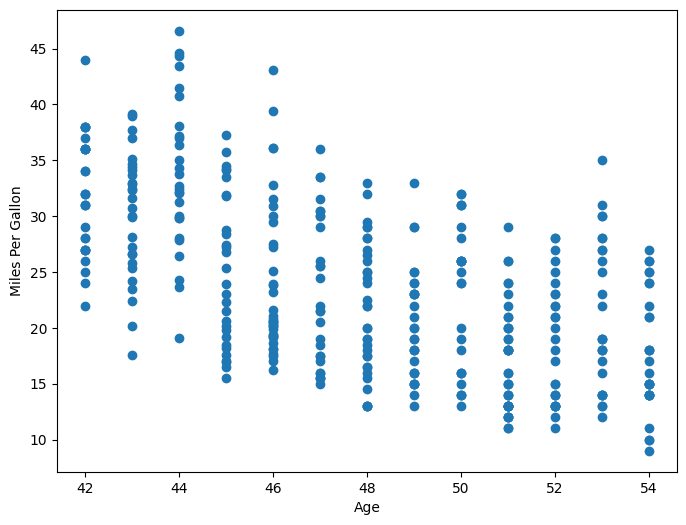

In [28]:
fig, ax= plt.subplots(figsize=(8,6))

plt.scatter(automobile_df['age'],automobile_df['mpg'])

plt.xlabel("Age")
plt.ylabel("Miles Per Gallon");

This seems tell us that Older cars have lower mileage

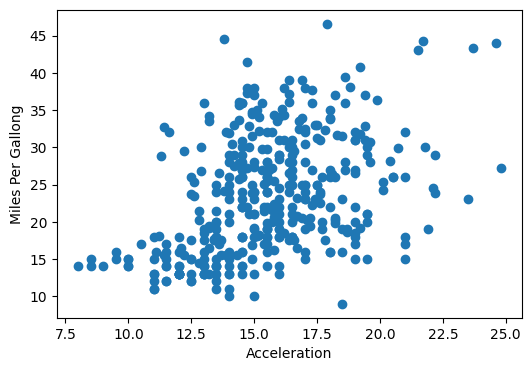

In [31]:
fig, ax= plt.subplots(figsize=(6,4))

plt.scatter(automobile_df['acceleration'],automobile_df.mpg)

plt.xlabel("Acceleration")
plt.ylabel("Miles Per Gallong");

Text(0, 0.5, 'Miles Per Gallon')

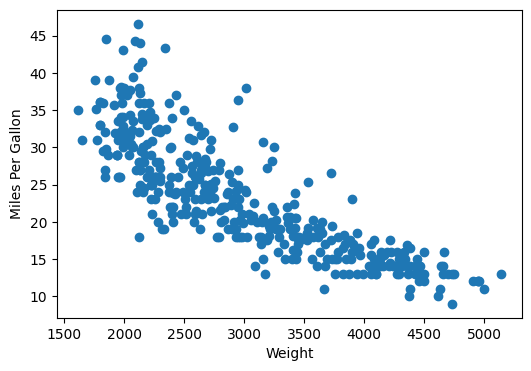

In [34]:
fig, ax= plt.subplots(figsize=(6,4))

plt.scatter(automobile_df['weight'],automobile_df.mpg)

plt.xlabel('Weight')
plt.ylabel('Miles Per Gallon')

Yes, definitely there is downward trend here ,it seems like greater weight of the car lower its mileage which make sense to use intutively 

Text(0, 0.5, 'Miles per Gallon')

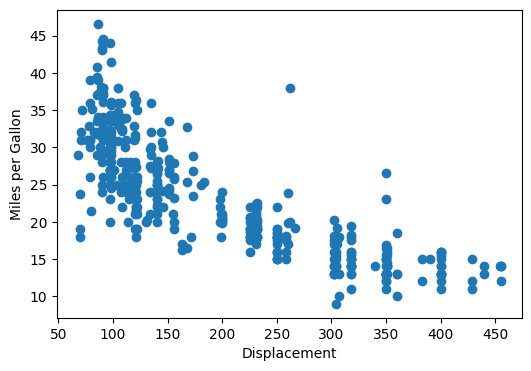

In [ ]:
fig ,ax= plt.subplots(figsize=(6,4))

plt.scatter(automobile_df['displacement'],automobile_df.mpg)

plt.xlabel('Displacement')
plt.ylabel("Miles per Gallon");

The Greater Displacement of the car off the ground , lower the miles per gallon it travles

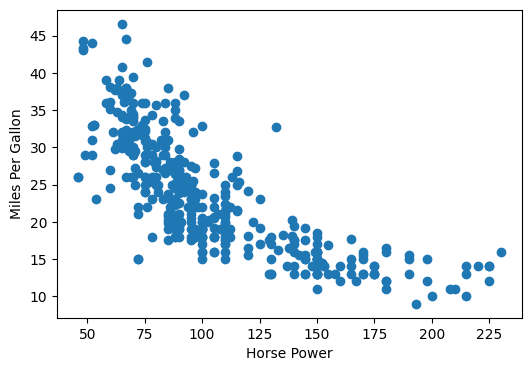

In [37]:
fig ,ax = plt.subplots(figsize=(6,4))

plt.scatter(automobile_df['horsepower'],automobile_df.mpg)

plt.xlabel("Horse Power")
plt.ylabel("Miles Per Gallon");

Text(0, 0.5, 'Miles per Gallon')

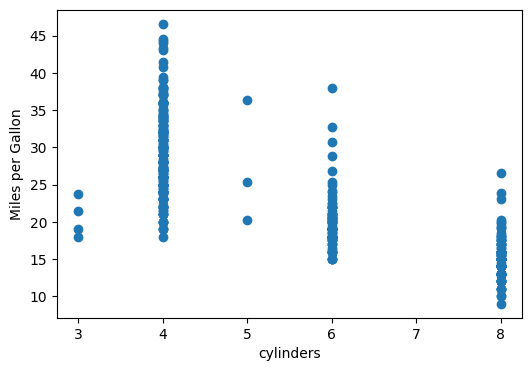

In [39]:
fig ,ax = plt.subplots(figsize=(6,4))

plt.scatter(automobile_df['cylinders'],automobile_df.mpg)

plt.xlabel("cylinders")
plt.ylabel("Miles per Gallon")

Actullay, i realy love to put all them together

In [43]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,54
1,15.0,8,350.0,165,3693,11.5,54
2,18.0,8,318.0,150,3436,11.0,54
3,16.0,8,304.0,150,3433,12.0,54
4,17.0,8,302.0,140,3449,10.5,54


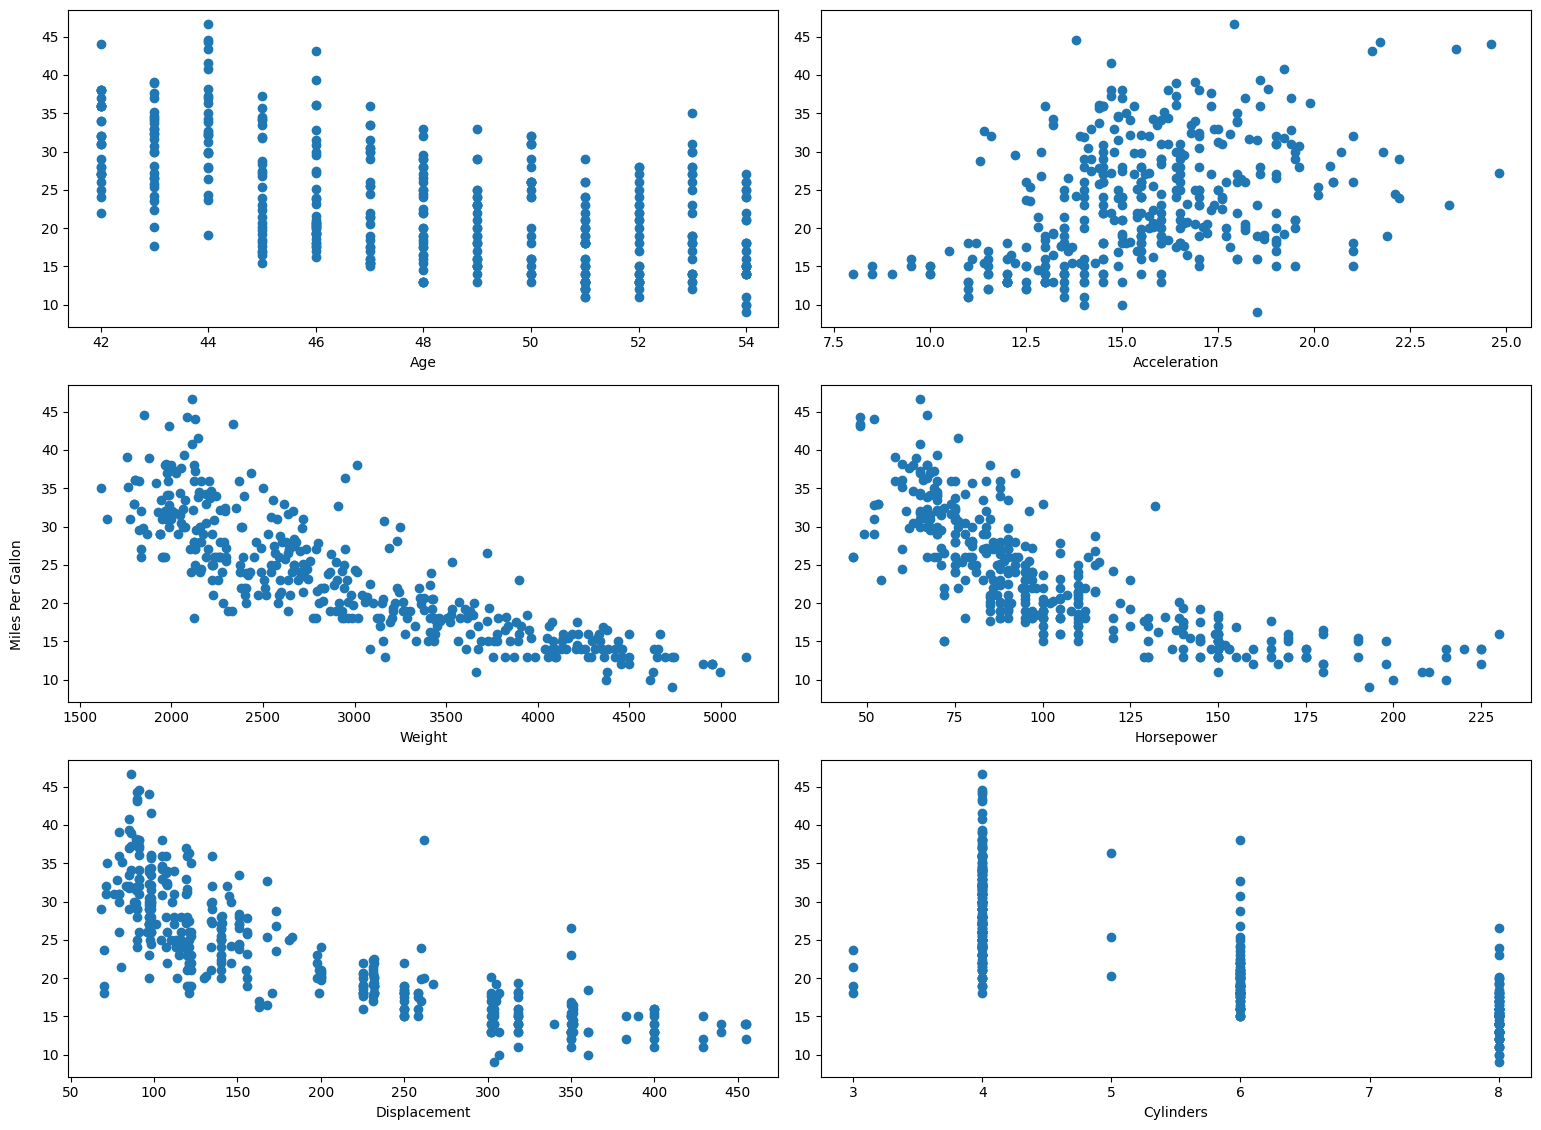

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(16, 12))

ax1.scatter(automobile_df['age'], automobile_df.mpg)
ax2.scatter(automobile_df['acceleration'], automobile_df.mpg)
ax3.scatter(automobile_df['weight'], automobile_df.mpg)
ax4.scatter(automobile_df['horsepower'], automobile_df.mpg)
ax5.scatter(automobile_df['displacement'], automobile_df.mpg)
ax6.scatter(automobile_df['cylinders'], automobile_df.mpg)


ax1.set_xlabel('Age')
ax2.set_xlabel('Acceleration')
ax3.set_xlabel('Weight')
ax4.set_xlabel('Horsepower')
ax5.set_xlabel('Displacement')
ax6.set_xlabel('Cylinders')


fig.text(0.04, 0.5, 'Miles Per Gallon', va='center', rotation='vertical')

fig.tight_layout(rect=[0.05, 0.05, 1, 1])

plt.show()

In [40]:
automobile_df_corr= automobile_df.corr()

automobile_df_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


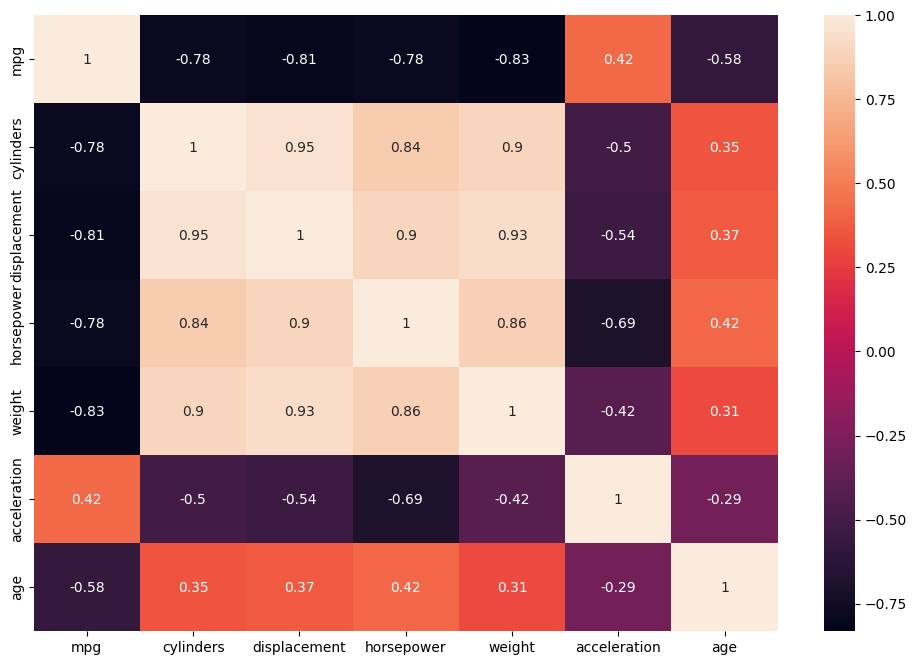

In [67]:
fig, ax= plt.subplots(figsize=(12,8))
sns.heatmap(automobile_df_corr,annot=True);

In [59]:
automobile_df=automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,23.0,4,120.0,97,2506,14.5,52
1,26.0,4,121.0,113,2234,12.5,54
2,15.0,8,400.0,150,3761,9.5,54
3,25.4,6,168.0,116,2900,12.6,43
4,19.0,6,250.0,88,3302,15.5,53


In [60]:
automobile_df.to_csv("datasets/auto-mpg-processed.csv",index=False)